cloning yolov5 root folder - manual at the same link

In [2]:
!git clone https://github.com/ultralytics/yolov5 

Cloning into 'yolov5'...


install usual stuff

In [ ]:
!cd yolov5 & pip install -r requirements.txt

importing libs

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

loading model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\custom/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-31 Python-3.10.5 torch-1.12.1+cpu CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

test

In [7]:
img = 'cars.jpg'

In [8]:
res = model(img)
res.print()

image 1/1: 599x900 5 cars, 3 trucks
Speed: 250.6ms pre-process, 289.9ms inference, 7.8ms NMS per image at shape (1, 3, 448, 640)


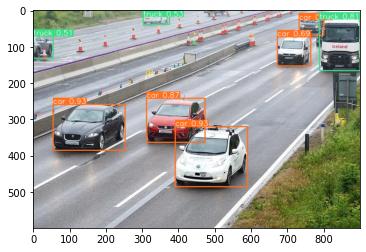

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(res.render()))
plt.show()

In [10]:
res.show()

labeling custom images with LabelImg opensource project - github bellow

In [11]:
!git clone https://github.com/heartexlabs/labelImg

Cloning into 'labelImg'...


Labeling all pictures and saving their labels

training model with custom dataset, testing different values for hyperparamenters 

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epoch 80 --data custom_dataset.yaml --weights yolov5s.pt

In [3]:
model = torch.hub.load('ultralytics/yolov5','custom',path='yolov5/runs/train/exp2/weights/last.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\custom/.cache\torch\hub\master.zip
YOLOv5  2022-9-1 Python-3.10.5 torch-1.12.1+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [10]:
i = "myfish1.png"

In [11]:
res= model(i)

In [12]:
print(res)

image 1/1: 900x1600 1 qwerty, 2 blinkys
Speed: 75.2ms pre-process, 210.4ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)



By using some of validation pictures we see that our model is not perfect. there is 2 matches for "blinky" fish, but the second one is 0.41.

note to myself - set a validation point >50%, and see model preformance

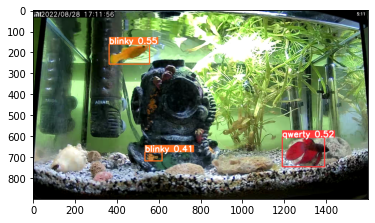

In [14]:
%matplotlib inline 
plt.imshow(np.squeeze(res.render()))
plt.show()

detection in video

In [22]:

cap = cv2.VideoCapture("#####.mp4")
while cap.isOpened():
    _ ,frame = cap.read()

    results = model(frame)

    cv2.imshow("ribiceeee",np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()